# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

from PIL import Image

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


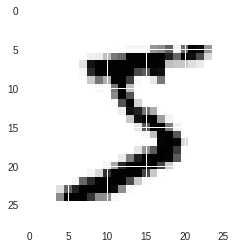

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)

#training the image preprocessing
image_gen.fit(X_train, augment=True)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(SeparableConv2D(64, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(SeparableConv2D(64, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(SeparableConv2D(64, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 24, 24, 32)        1344      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 10, 10, 64)        2400      
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 64)        256       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1)


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.1320 - acc: 0.9598
Epoch 2/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0528 - acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0407 - acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 33s 550us/step - loss: 0.0348 - acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0305 - acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0261 - acc: 0.9920
Epoch 7/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0238 - acc: 0.9928
Epoch 8/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0225 - acc: 0.9931
Epoch 9/10
60000/60000 [==============================] - 33s 552us/step - loss: 0.0204 - acc: 0.9939
Epoch 10/10
60000/60000 [==============================] - 33s 552us/step - loss: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 19s 321us/step - loss: 0.0124 - acc: 0.9961
Epoch 2/10
60000/60000 [==============================] - 19s 320us/step - loss: 0.0097 - acc: 0.9972
Epoch 3/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0098 - acc: 0.9970
Epoch 4/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0085 - acc: 0.9972
Epoch 5/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0069 - acc: 0.9976
Epoch 6/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0065 - acc: 0.9980
Epoch 7/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0063 - acc: 0.9980
Epoch 8/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0058 - acc: 0.9982
Epoch 9/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.0050 - acc: 0.9986
Epoch 10/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0061 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.035567245452520185, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.00122440e-15 3.93737151e-16 5.24705842e-14 3.75507620e-15
  7.97488283e-24 8.82805303e-19 1.92419829e-32 1.00000000e+00
  1.27065303e-18 4.25119385e-13]
 [5.56759109e-12 1.04130288e-10 1.00000000e+00 8.61700772e-19
  1.32381477e-15 1.86748737e-26 2.24913760e-15 2.94795093e-18
  5.23339463e-22 5.44211125e-17]
 [4.96022833e-15 1.00000000e+00 9.15920118e-13 4.66576484e-13
  7.38217820e-12 9.26685291e-12 1.00223746e-12 1.24657651e-09
  3.13647851e-15 3.44142358e-12]
 [1.00000000e+00 1.05905460e-23 3.75588934e-17 2.61143555e-22
  6.15745183e-19 6.32671547e-20 1.82054176e-12 1.19252838e-21
  6.02527942e-14 2.45058675e-16]
 [4.59869178e-23 9.77217424e-19 2.34030689e-20 4.12437534e-25
  1.00000000e+00 1.02285784e-18 7.48560286e-22 1.39461078e-14
  6.03594107e-18 5.53225608e-12]
 [4.85924464e-15 1.00000000e+00 7.19054113e-12 1.88550783e-15
  2.34580888e-12 1.91236667e-16 3.64643279e-14 7.47111795e-09
  1.36243915e-15 1.89095983e-12]
 [4.14775576e-26 9.09041453e-10 2.81425406e-17 1.48137647e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored